# KNN算法的实现

In [1]:
from numpy import *
#import numpy 就不能用tile了
import operator

In [2]:
#设置数据集
def CreateDataSet():
    group = [[1.0, 1.1],[1.0, 1.0],[0, 0],[0, 0.1]]
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = CreateDataSet()

In [4]:
group

[[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]]

In [5]:
labels

['A', 'A', 'B', 'B']

In [27]:
#knn
def classify0(inx, dataset, labels, k):
    '''
    inx:要测试的样本点
    dataset:数据集
    labels:标签
    k：选取k个附近的值
    '''
    #求距离
    dataset_size = len(dataset)    #但是dataset是一个list， 没有shape这个属性
    difmat = tile(inx, (dataset_size, 1)) - dataset   #tile是将inx进行重复，（dataset_size, 1）重复dataset行，1列
    #距离平方
    sq_diff = difmat**2
    #平方后的和
    sql_diff_sum = sq_diff.sum(axis=1)
    #距离开方
    distance = sql_diff_sum ** 0.5
    #距离的排序
    sortdistance_index = distance.argsort()  #返回数值从小到大的索引 [2, 3, 1, 0]
    #获取label的键值对
    Count = {}
    #提取前k个索引
    for i in range(k):
        label = labels[sortdistance_index[i]]          #sortdistance_index[i]获得的是下标
        Count[label] = Count.get(label, 0)+1           # Count.get(label, 0)+1返回指定建的值，如果不在字典中，就返回默认0+1
#         if(label in Count.key):
#             Count[label] += 1
#         else:
#             Count[label] = 1

    #判断哪个label最多  key=operator.itemgetter(1)指定排序时的比较函数，用第一个域进行排序
    sortClass = sorted(Count.items(), key=operator.itemgetter(1), reverse=True)
    return sortClass[0][0]
#     return Count.iteritems()

In [41]:
classify0([0,1], group, labels, 3)

0

# 海伦约会KNN

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
def filematrix(filename):
    f = pd.read_csv(filename,  header=None, sep="\t")
    dataset = f[[0,1,2]]
    labels = f[3]
    return dataset, labels

In [30]:
filename = "datingTestSet.txt"
dataset, labels = filematrix(filename)

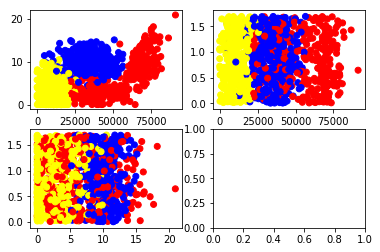

In [31]:
ColorBar = []
#将lables替换成数值类型
ca = pd.Categorical(labels)
labels = list(ca.codes)
for i in range(len(labels)):
    if(labels[i] == 0):
        ColorBar.append("red")
    if(labels[i] == 1):
        ColorBar.append("blue")
    if(labels[i] == 2):
        ColorBar.append("yellow")
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
ax[0][0].scatter(dataset[0], dataset[1], color=ColorBar)
ax[0][1].scatter(dataset[0], dataset[2], color=ColorBar)
ax[1][0].scatter(dataset[1], dataset[2], color=ColorBar)
plt.show()

In [42]:
type(labels[0])

numpy.int8

In [32]:
def Norm_Feature(dataset):
    min_val = dataset.min(0).as_matrix()
    max_val = dataset.max(0).as_matrix()
    norm_dataset = np.zeros(dataset.shape)
    dataset = dataset.as_matrix()
    k = dataset.shape[0]
    norm_dataset = dataset - tile(min_val, (k, 1))
    min_max = max_val - min_val
    norm_dataset = norm_dataset / tile(min_max, (k, 1))
    return norm_dataset, min_max, min_val

In [47]:
def date_test(dataset):
    #读取数据
    dataset, labels = filematrix(dataset)
    
    #将labels转换成数值类型
    ca = pd.Categorical(labels)
    labels = list(ca.codes)
    
    #标签正则化
    norm_dataset, min_max, min_val = Norm_Feature(dataset)
    error_num = 0
    ratio = 0.05
    k = norm_dataset.shape[0]
    test_num = int(ratio * k)
    #对测试样本中每个样本进行测试
    for i in range(test_num):
        test_result = classify0(norm_dataset[i,:], norm_dataset[test_num:k, :], labels[test_num:k], 3)
        print("test is %d, real is %d" %(test_result, labels[i]))
        if(test_result != labels[i]):
            error_num +=1
    print("the error is:%d" %error_num)


In [48]:
date_test(filename)

test is 1, real is 1
test is 2, real is 2
test is 0, real is 0
test is 0, real is 0
test is 0, real is 0
test is 0, real is 0
test is 1, real is 1
test is 1, real is 1
test is 0, real is 0
test is 1, real is 1
test is 0, real is 0
test is 0, real is 0
test is 2, real is 2
test is 0, real is 0
test is 0, real is 0
test is 0, real is 0
test is 0, real is 0
test is 0, real is 0
test is 2, real is 2
test is 1, real is 1
test is 2, real is 2
test is 0, real is 0
test is 1, real is 2
test is 1, real is 1
test is 2, real is 2
test is 1, real is 1
test is 2, real is 2
test is 1, real is 1
test is 2, real is 2
test is 0, real is 0
test is 1, real is 1
test is 0, real is 0
test is 1, real is 1
test is 0, real is 0
test is 2, real is 2
test is 0, real is 0
test is 0, real is 0
test is 2, real is 2
test is 1, real is 1
test is 1, real is 1
test is 0, real is 0
test is 2, real is 2
test is 1, real is 1
test is 1, real is 1
test is 1, real is 1
test is 0, real is 0
test is 0, real is 0
test is 0, re

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
